# PSF of an electron beam from signal derivative

This can be done under several assumptions:
1. The measured feature represents a step function. An important feature of a step-function the following:

        The convolution of any function with a step function is the integral of the original function.

The intensity profile of the measured signal at scan point $(x_0)$ is a convolution between the local emission $E(x)$ and the beam intensity distribution or the beam PSF $B(x)$:

$$
I(x_0)=\int_{x}^{} E(x)\cdot B(x_0-x)\cdot dx
$$

The derivative of the measured signal is the profile of the original beam $B(x)$:

$$
B(x)=I(x)'
$$

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [64]:
# 1. Create a step-function profile
x = np.linspace(-10, 10, 1000)
step_profile = np.heaviside(x, 1)

In [65]:
# 2. Create a Gaussian function profile
mu = 0  # mean
sigma = 1  # standard deviation
gaussian_profile = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

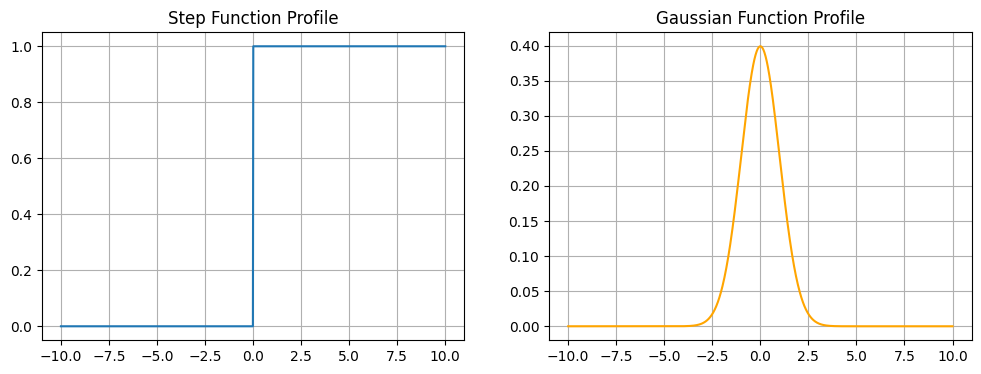

In [66]:
# Plot the step and Gaussian profiles side by side
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x, step_profile, label='Step Function')
plt.title('Step Function Profile')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, gaussian_profile, label='Gaussian Function', color='orange')
plt.title('Gaussian Function Profile')
plt.grid(True)

plt.show()

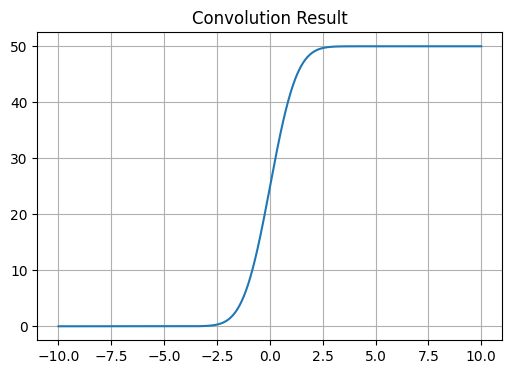

In [70]:
# 3. Convolve the step-function with the Gaussian profile
step_profile_padded = np.pad(step_profile, (0, len(gaussian_profile) - 1), 'constant', constant_values=(0, 1))
convolution_result_padded = np.convolve(step_profile_padded, gaussian_profile, mode='same')
convolution_result = convolution_result_padded[:len(x)]

# Plot the convolution result
plt.figure(figsize=(6, 4))
plt.plot(x, convolution_result, label='Convolution of Step and Gaussian')
plt.title('Convolution Result')
plt.grid(True)
plt.show()

In [68]:
# 4. Take the derivative of the convolution product
derivative_result = np.gradient(convolution_result, x)

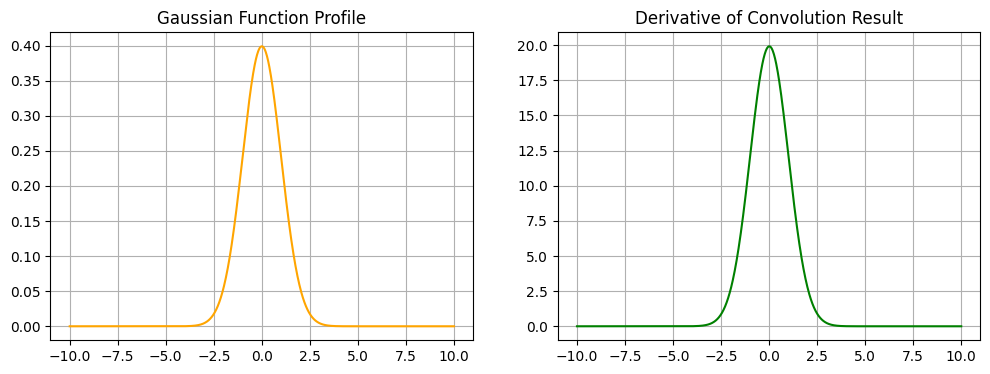

In [71]:
# Plot the derivative of the convolution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x, gaussian_profile, label='Gaussian Function', color='orange')
plt.title('Gaussian Function Profile')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, derivative_result, label='Derivative of Convolution', color='green')
plt.title('Derivative of Convolution Result')
plt.grid(True)
plt.show()
